In [60]:
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] 
from statsmodels.tsa.vector_ar.var_model import VAR

In [26]:
estimate_from_mobile_data = np.load('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_from_mobile_data.npy')
estimate_month7_Geo = np.load('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_month7_Geo.npy')

In [27]:
estimate_from_mobile_data_flatten = estimate_from_mobile_data.flatten()
estimate_month7_Geo_flatten = estimate_month7_Geo.flatten()

In [28]:
columns = ['population']
df_mobile = pd.DataFrame(data=estimate_from_mobile_data_flatten, columns=columns, dtype='float')
df_Geo = pd.DataFrame(data=estimate_month7_Geo_flatten , columns=columns, dtype='float')

<AxesSubplot:>

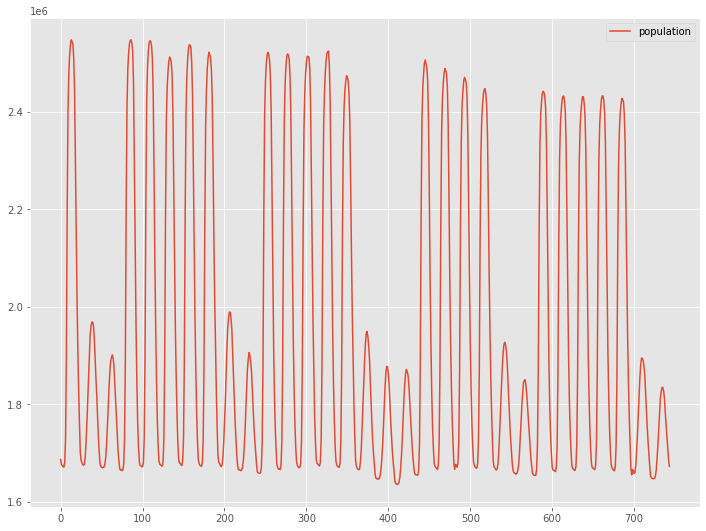

In [29]:
df_mobile.plot()

<AxesSubplot:>

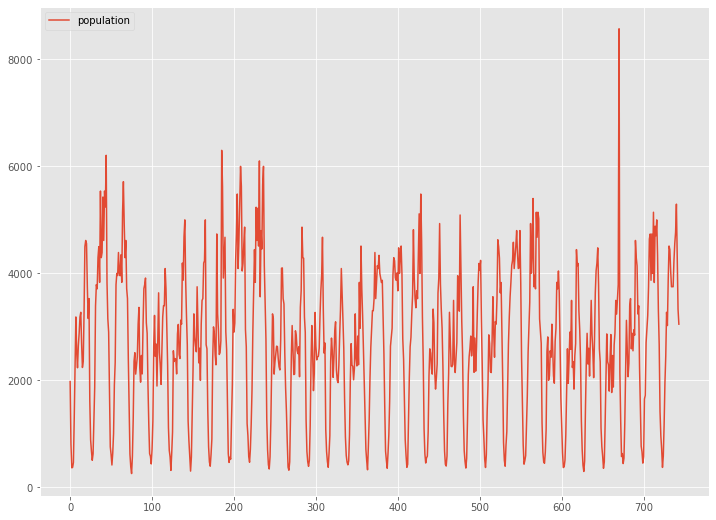

In [30]:
df_Geo.plot()

# 加算モデル

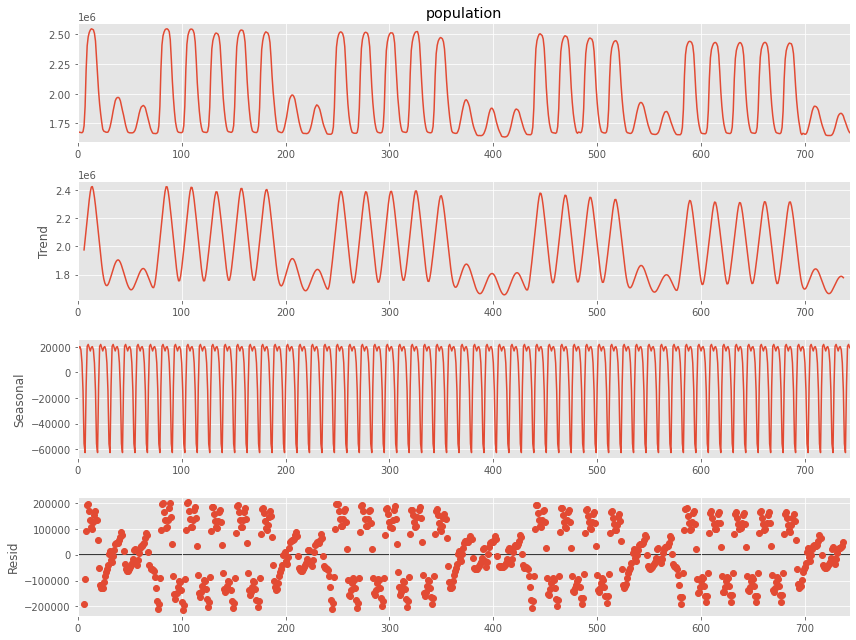

In [31]:
# 成分分解
result=seasonal_decompose(df_mobile.population, model='additive', period=12)
# グラフ化
result.plot()
plt.show()

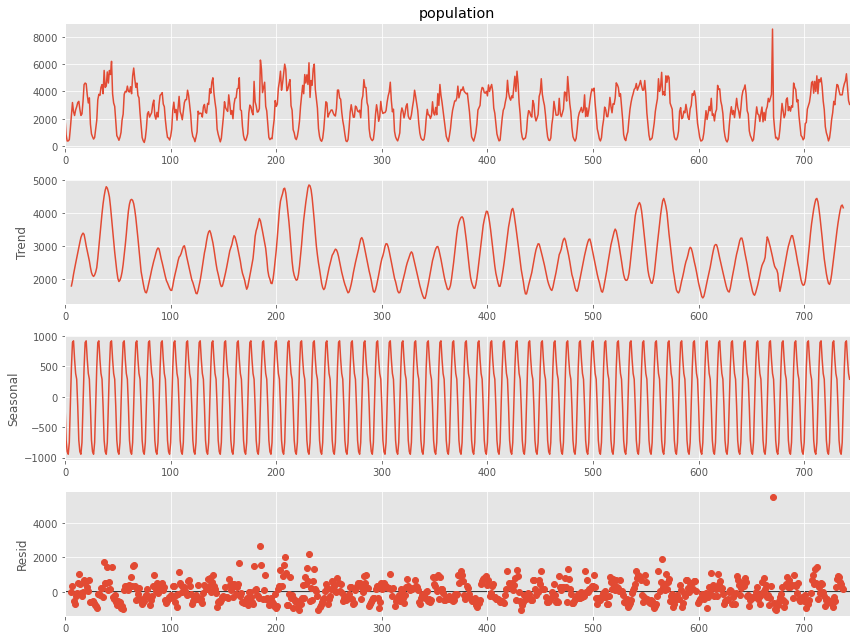

In [32]:
# 成分分解
result=seasonal_decompose(df_Geo.population, model='additive', period=12)
# グラフ化
result.plot()
plt.show()

# 乗算モデル

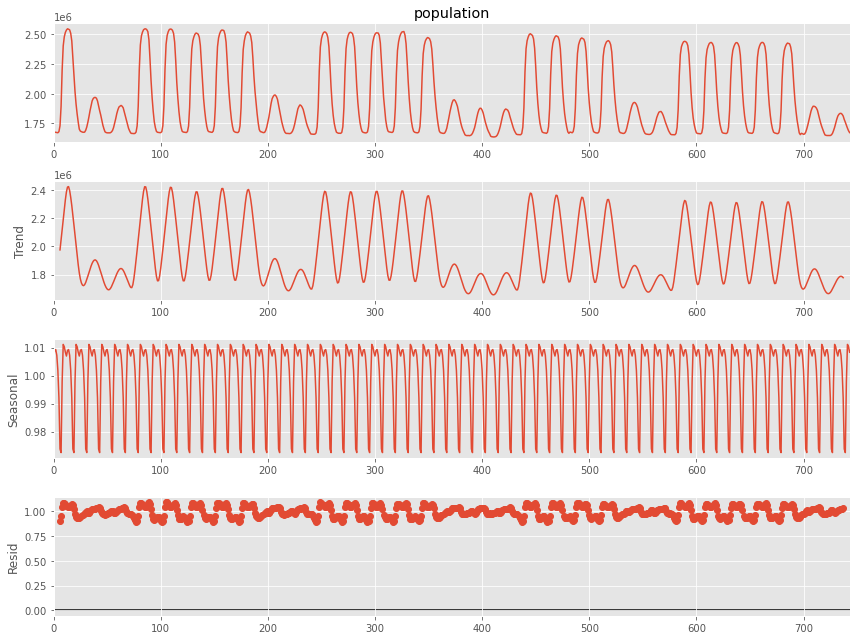

In [33]:
# 成分分解
result=seasonal_decompose(df_mobile.population, model='multiplicative', period=12)
# グラフ化
result.plot()
plt.show()

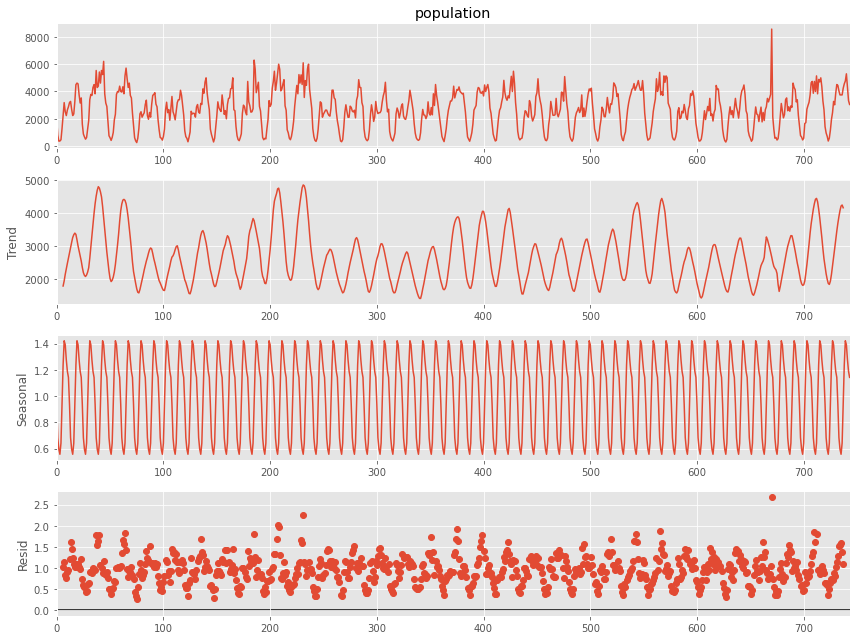

In [34]:
# 成分分解
result=seasonal_decompose(df_Geo.population, model='multiplicative', period=12)
# グラフ化
result.plot()
plt.show()

# STL分解

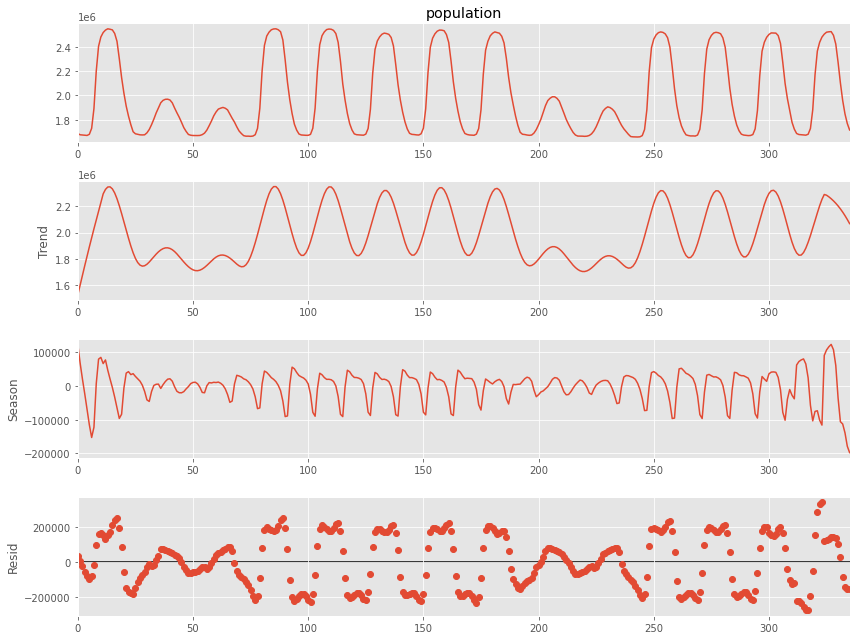

In [35]:
# 成分分解
stl=STL(df_mobile.population[0:336], period=12, robust=True).fit()
# STL分解結果のグラフ化
stl.plot()
plt.show()

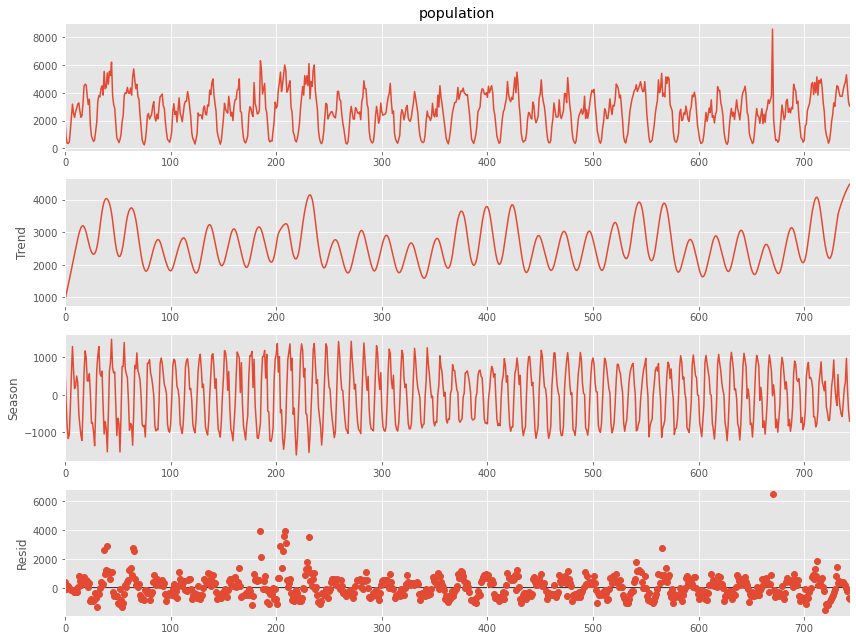

In [36]:
# 成分分解
stl=STL(df_Geo.population, period=12, robust=True).fit()
# STL分解結果のグラフ化
stl.plot()
plt.show()

# ADF検定 帰無仮説: 時系列は非定常である　の検定

In [37]:
dftest = adfuller(df_mobile.population)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -2.103716
p-value: 0.243023
Critical values :
	 1% -3.4394269973845657
	 5% -2.8655458544300387
	 10% -2.568903174551249


In [38]:
dftest = adfuller(df_Geo.population)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -3.602157
p-value: 0.005720
Critical values :
	 1% -3.4394269973845657
	 5% -2.8655458544300387
	 10% -2.568903174551249


# 定常に変化させる

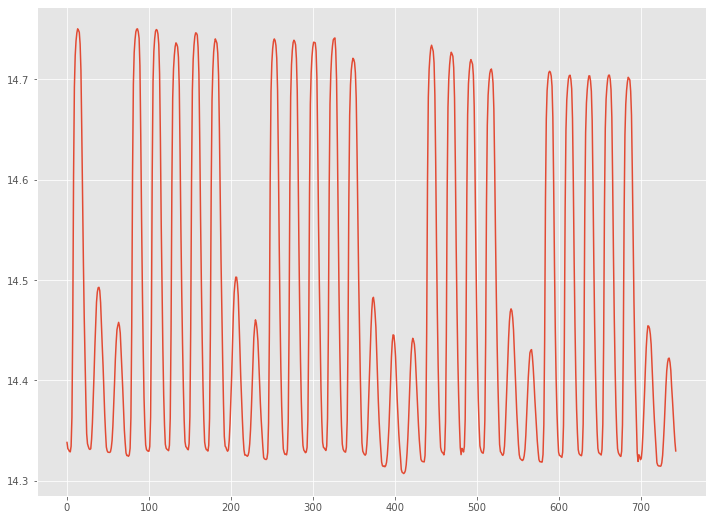

In [39]:
df_mobile_log = np.log(df_mobile.population)
plt.plot(df_mobile_log)

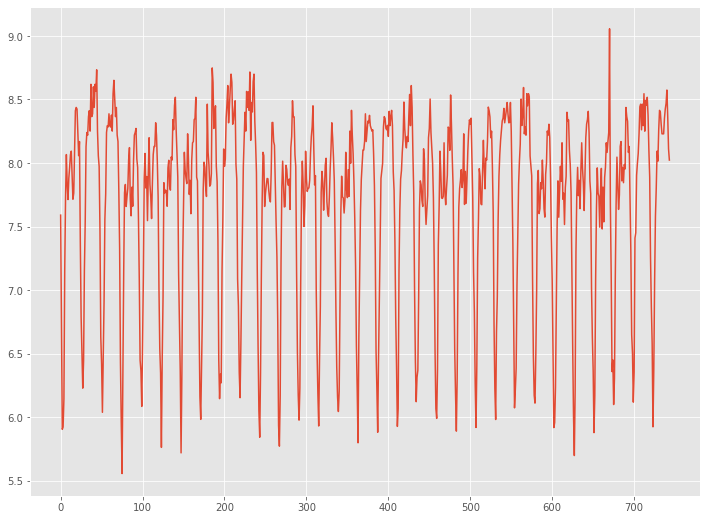

In [51]:
df_Geo_log = np.log(df_Geo.population)
plt.plot(df_Geo_log)

In [40]:
# ADF検定（対数系列）
dftest = adfuller(df_mobile_log)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -2.234773
p-value: 0.193868
Critical values :
	 1% -3.4394269973845657
	 5% -2.8655458544300387
	 10% -2.568903174551249


In [52]:
# ADF検定（対数系列）
dftest = adfuller(df_Geo_log)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.733548
p-value: 0.000073
Critical values :
	 1% -3.4394269973845657
	 5% -2.8655458544300387
	 10% -2.568903174551249


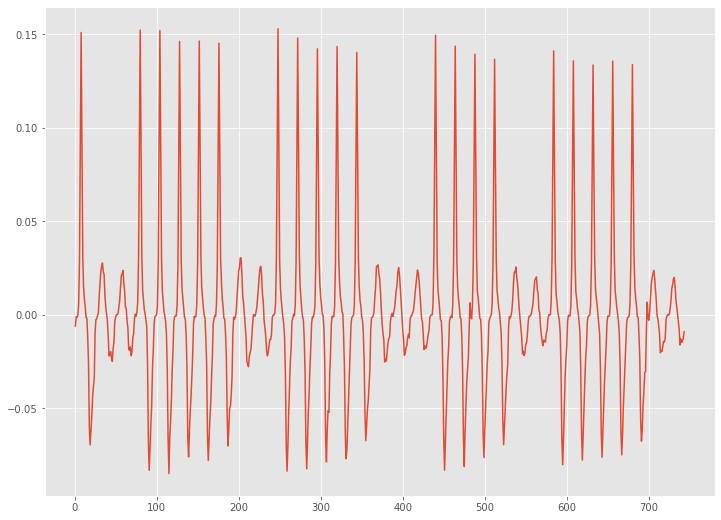

In [41]:
# 階差
df_mobile_log_diff1 = df_mobile_log.diff(1).dropna()
plt.plot(df_mobile_log_diff1)

In [42]:
# ADF検定
dftest = adfuller(df_mobile_log_diff1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -11.659303
p-value: 0.000000
Critical values :
	 1% -3.4394269973845657
	 5% -2.8655458544300387
	 10% -2.568903174551249


In [57]:
ct_results = adfuller(df_mobile_diff1['population'],regression='ct')  #対立仮説：定数項＋トレンド＋定常過程
c_results = adfuller(df_mobile_diff1['population'],regression='c')    #対立仮説：定数項＋定常過程
n_results = adfuller(df_mobile_diff1['population'],regression='n')    #対立仮説：定常過程（定数項なし）
# p値
print(ct_results[1])
print(c_results[1])
print(n_results[1])

1.2078540680783828e-16
5.276825684336695e-19
4.571548409526367e-19


In [58]:
ct_results = adfuller(df_Geo_diff1['population'],regression='ct')  #対立仮説：定数項＋トレンド＋定常過程
c_results = adfuller(df_Geo_diff1['population'],regression='c')    #対立仮説：定数項＋定常過程
n_results = adfuller(df_Geo_diff1['population'],regression='n')    #対立仮説：定常過程（定数項なし）
# p値
print(ct_results[1])
print(c_results[1])
print(n_results[1])

0.0
0.0
0.0


In [64]:
df_mobile

,population
0,1686458.0
1,1676150.0
2,1674058.0
3,1671417.0
4,1670713.0
...,...
739,1759619.0
740,1733671.0
741,1709396.0
742,1687636.0


In [61]:
# データフレームを配列へ変換
x = df_mobile.to_numpy()
# 最大のラグ数
maxlags = 10
# モデルのインスタンス生成
model = VAR(x)
# 最適なラグの探索
lag = model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['aic'],'\n')
# モデルの学習
results = model.fit(lag['aic'])
print(results.summary())

ValueError: Only gave one variable to VAR